# Transformação de Dados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = sns.load_dataset('titanic')

## 1 Verificando os dados faltantes

In [4]:
print("Quantidade de valores faltantes por variável:")
print(df.isnull().sum())

Quantidade de valores faltantes por variável:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


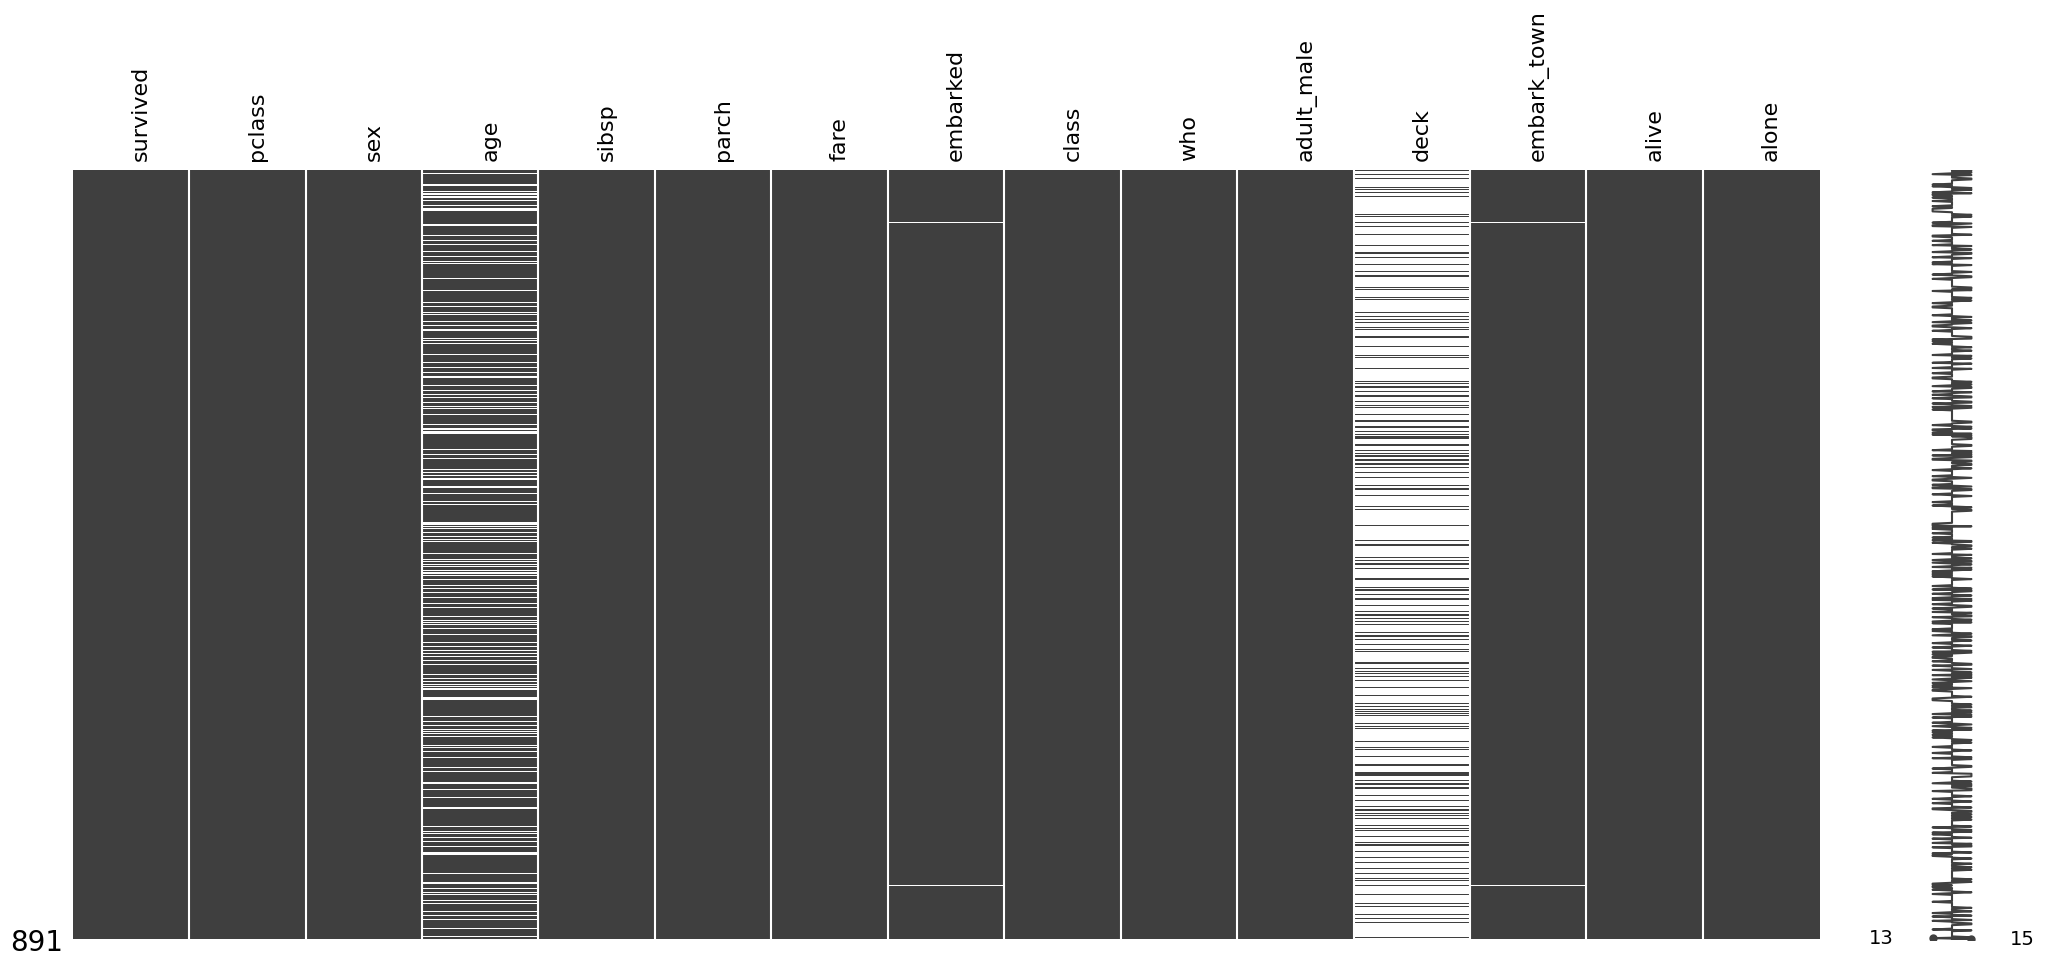

In [5]:
msno.matrix(df)
plt.xticks(rotation=90)
plt.yticks(ticks=range(1, len(df) + 1))
plt.show()

## 2 Tratamento de outliers
### 2.1 Visualizando um boxplot para identificar outliers na coluna 'fare'

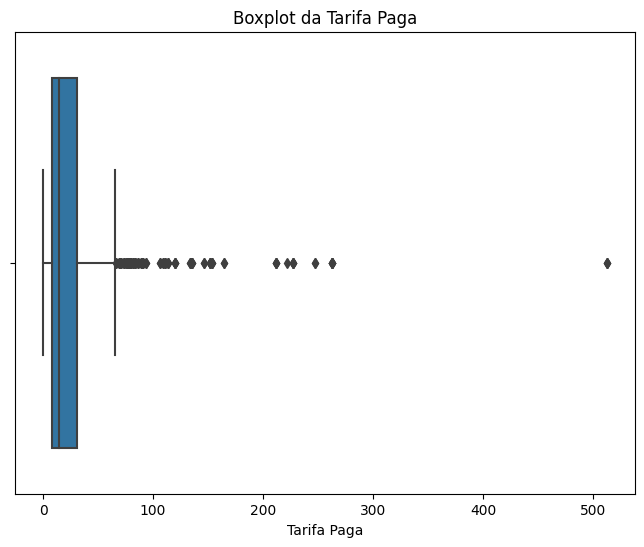

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['fare'])
plt.xlabel('Tarifa Paga')
plt.title('Boxplot da Tarifa Paga')
plt.show()

### 2.2 Identificando os outliers utilizando o método IQR

Calculando o primeiro quartil (Q1), o terceiro quartil (Q3) e o intervalo interquartil (IQR)
Q1.

In [24]:
Q1 = df_cleaned['fare'].quantile(0.25)
Q3 = df_cleaned['fare'].quantile(0.75)
IQR = Q3 - Q1

Calculando os limites inferior e superior para identificar outliers.

In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Calcula-se o limite inferior (lower_bound) e o limite superior (upper_bound) usando o método do intervalo interquartil (IQR). Valores fora desses limites são considerados outliers.

### 2.3 Remoção de outliers

In [26]:
df_cleaned = df_cleaned[(df_cleaned['fare'] >= lower_bound) & (df_cleaned['fare'] <= upper_bound)]

Verificando novamente a distribuição da coluna 'fare' após a remoção de outliers.

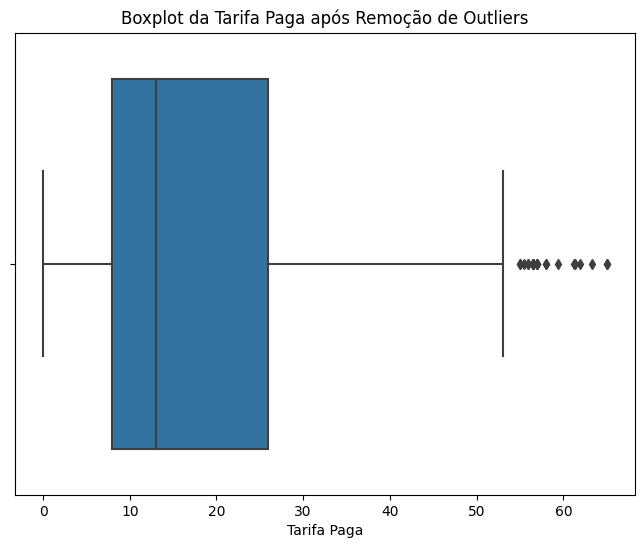

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['fare'])
plt.xlabel('Tarifa Paga')
plt.title('Boxplot da Tarifa Paga após Remoção de Outliers')
plt.show()

## 3 Limpeza de dados

### 3.1 Removendo linhas com valores ausentes nas colunas 'embarked' e 'embark_town'
Como essas colunas tem poucos dados ausentes, iremos apenas apagar esses valores faltantes.

In [7]:
df_cleaned = df.dropna(subset=['embarked', 'embark_town']).copy()

### 3.2 Preencher valores ausentes na coluna 'age' com a mediana das idades
Usei a mediana porque ela é menos sensível em relação aos outliers do que a média.

In [8]:
median_age = df_cleaned['age'].median()
df_cleaned.loc[:, 'age'] = df_cleaned['age'].fillna(median_age)

### 3.3 Descartando a coluna 'deck' porque possui um grande número de valores ausentes
Removi a coluna 'deck' porque ela tem muitos valores ausentes.

In [9]:
df_cleaned.drop('deck', axis=1, inplace=True)

Verificando novamente os dados faltantes após a limpeza.

In [10]:
print("\nDados faltantes após a limpeza:")
print(df_cleaned.isnull().sum())


Dados faltantes após a limpeza:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


### 3.4 Codificando variáveis qualitativas (nominais e ordinais)
Converti a coluna 'sex' para valores numéricos para facilitar o uso em modelos de machine learning.

In [11]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})

### 3.5 Codificando a coluna 'embarked' (nominal)
Converti a coluna 'embarked' para valores numéricos para facilitar o uso em modelos de machine learning.

In [12]:
df_cleaned['embarked'] = df_cleaned['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

### 3.6 Codificando a coluna 'class' (ordinal)
Converti a coluna 'class' em números para mostrar a ordem das classes (Primeira > Segunda > Terceira).

In [13]:
df_cleaned['class'] = df_cleaned['class'].map({'First': 1, 'Second': 2, 'Third': 3})

### 3.7 Codificando a coluna 'who' (nominal)
Converti a coluna 'who' para valores numéricos para facilitar o uso em modelos de machine learning.

In [14]:
df_cleaned['who'] = df_cleaned['who'].map({'man': 0, 'woman': 1, 'child': 2})

### 3.8 Codificando a coluna 'adult_male' (nominal)
Converti a coluna 'adult_male' para valores numéricos (0 ou 1) para facilitar o uso em modelos de machine learning.

In [15]:
df_cleaned['adult_male'] = df_cleaned['adult_male'].astype(int)

### 3.9 Codificando a coluna 'alive' (nominal)
Converti a coluna 'alive' para valores numéricos (0 ou 1) para facilitar o uso em modelos de machine learning.

In [16]:
df_cleaned['alive'] = df_cleaned['alive'].map({'no': 0, 'yes': 1})

### 3.10 Codificar a coluna 'alone' (nominal)
Converti a coluna 'alone' para valores numéricos (0 ou 1) para facilitar o uso em modelos de machine learning.

In [17]:
df_cleaned['alone'] = df_cleaned['alone'].astype(int)

Verificando as primeiras linhas do DataFrame limpo e codificado.

In [18]:
print("\nDataFrame após a limpeza e codificação:")
print(df_cleaned.head())


DataFrame após a limpeza e codificação:
   survived  pclass  sex   age  sibsp  parch     fare  embarked class  who  \
0         0       3    0  22.0      1      0   7.2500         2     3    0   
1         1       1    1  38.0      1      0  71.2833         0     1    1   
2         1       3    1  26.0      0      0   7.9250         2     3    1   
3         1       1    1  35.0      1      0  53.1000         2     1    1   
4         0       3    0  35.0      0      0   8.0500         2     3    0   

   adult_male  embark_town  alive  alone  
0           1  Southampton      0      0  
1           0    Cherbourg      1      0  
2           0  Southampton      1      1  
3           0  Southampton      1      0  
4           1  Southampton      0      1  


In [19]:
df_cleaned.to_csv('../data/processed/titanic_cleaned.csv', index=False)